# 1) BUSINESS UNDERSTANDING

The Colibri Wireless device, a cutting-edge Inertial Measurement Unit (IMU) designed to revolutionize the wearable technology market, was recently unveiled by Trivisio. The device is strategically placed on the user's dominant leg's wrist, chest, and ankle and is outfitted with three advanced sensors that monitor magnetic field, angular rate, and acceleration. This one-of-a-kind design ensures thorough data collection for analyzing various physical activities.

Our dataset, which includes readings from nine people participating in twelve different physical activities, is a rich data source. We hope to use this data to improve the predictive capabilities of the Colibri Wireless unit, which range from simple activities like walking, cycling, and football to more complex tasks like vacuuming and rope jumping. Each subject's heart-rate monitor data adds another layer of analytical depth.

Our challenge at Trivisio as data scientists is twofold: discover underlying patterns and relationships within the dataset and strategically apply this knowledge to position the Colibri Wireless unit as a superior competitor. In order to identify nuanced patterns in user behavior during various physical activities, our in-depth exploratory data analysis (EDA) focuses on IMU readings, heart rate data, and supporting attributes.

Beyond simply identifying data points, our goal is to gain practical insights. Through competitive analysis, we intend to strengthen our market position, particularly against Vicon's T40s, Xsens' MTW Awinda, InterSense's Wireless Inertia Cube3, and Optotrak Certus' OptoTrak 3020.

The Colibri Wireless unit's value proposition is found not only in its hardware capabilities, but also in its ability to use machine learning models for predictive analysis. We envision a future in which the device seamlessly integrates into the lives of users, providing automatic and personalized activity logging. To accomplish this, we plan to develop and test machine learning models that consider factors such as heart rate, temperature, acceleration, and angular rate. The ultimate goal is to create software that not only enhances user interfaces but also functions as a powerful prediction tool, anticipating and identifying user actions.

In this project, we are strictly adhering to the data science life cycle.


# 2) DATA COLLECTION

### 2.1) Import Necessary Libraries:- 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


import warnings
warnings.filterwarnings('ignore')

### 2.2) Import Data:- 

In [2]:
list_of_files = ['subject101.dat',
                 'subject102.dat',
                 'subject103.dat',
                 'subject104.dat',
                 'subject105.dat',
                 'subject106.dat',
                 'subject107.dat',
                 'subject108.dat',
                 'subject109.dat' ]

subjectID = [1,2,3,4,5,6,7,8,9]

activityIDdict = {0: 'transient',
              1: 'lying',
              2: 'sitting',
              3: 'standing',
              4: 'walking',
              5: 'running',
              6: 'cycling',
              7: 'Nordic_walking',
              9: 'watching_TV',
              10: 'computer_work',
              11: 'car driving',
              12: 'ascending_stairs',
              13: 'descending_stairs',
              16: 'vacuum_cleaning',
              17: 'ironing',
              18: 'folding_laundry',
              19: 'house_cleaning',
              20: 'playing_soccer',
              24: 'rope_jumping' }
              
colNames = ["timestamp", "activityID","heartrate"]

IMUhand = ['handTemperature', 
           'hand_acc16_1', 'hand_acc16_2', 'hand_acc16_3', 
           'hand_acc6_1', 'hand_acc6_2', 'hand_acc6_3', 
           'hand_gyro1', 'hand_gyro2', 'hand_gyro3', 
           'hand_magne1', 'hand_magne2', 'hand_magne3',
           'hand_orientation1', 'hand_orientation2', 'hand_orientation3', 'hand_orientation4']

IMUchest = ['chestTemperature', 
           'chest_acc16_1', 'chest_acc16_2', 'chest_acc16_3', 
           'chest_acc6_1', 'chest_acc6_2', 'chest_acc6_3', 
           'chest_gyro1', 'chest_gyro2', 'chest_gyro3', 
           'chest_magne1', 'chest_magne2', 'chest_magne3',
           'chest_orientation1', 'chest_orientation2', 'chest_orientation3', 'chest_orientation4']

IMUankle = ['ankleTemperature', 
           'ankle_acc16_1', 'ankle_acc16_2', 'ankle_acc16_3', 
           'ankle_acc6_1', 'ankle_acc6_2', 'ankle_acc6_3', 
           'ankle_gyro1', 'ankle_gyro2', 'ankle_gyro3', 
           'ankle_magne1', 'ankle_magne2', 'ankle_magne3',
           'ankle_orientation1', 'ankle_orientation2', 'ankle_orientation3', 'ankle_orientation4']

columns = colNames + IMUhand + IMUchest + IMUankle  #all columns in one list


In [3]:
# Initialize an empty list to store individual DataFrames
data_frames = []

# Iterate through the list of files and load each dataset
for i, file in enumerate(list_of_files):
    # Read the dataset for the current subject
    current_data = pd.read_csv(file, sep='\s+', header=None, names=columns)
    
    # Add 'subjectID' column to identify the subject
    current_data['subjectID'] = subjectID[i]
    
    # Append the current data to the list
    data_frames.append(current_data)

# Concatenate all individual DataFrames into one combined DataFrame
imu_data = pd.concat(data_frames, ignore_index=True)

# Map activityID to activity names
imu_data['activity'] = imu_data['activityID'].map(activityIDdict)

# Display the first few rows of the combined dataset for inspection
imu_data.head()


,timestamp,activityID,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_acc6_1,hand_acc6_2,hand_acc6_3,...,ankle_gyro3,ankle_magne1,ankle_magne2,ankle_magne3,ankle_orientation1,ankle_orientation2,ankle_orientation3,ankle_orientation4,subjectID,activity
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,1,transient
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,1,transient
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,1,transient
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,1,transient
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,1,transient


+ I have individually read the data from each DAT file, converted all the files into one dataframe, and labeled the columns appropriately. Now, my data is prepared for further analysis.

# 3) DATA UNDERSTANDING 

### 3.1) Initial Analysis:-

In [4]:
imu_data.shape # to know the rows and columns of the data.

(2872533, 56)

+ The dataset comprises 2,872,533 data points with 56 features.

In [5]:
imu_data.columns

Index(['timestamp', 'activityID', 'heartrate', 'handTemperature',
       'hand_acc16_1', 'hand_acc16_2', 'hand_acc16_3', 'hand_acc6_1',
       'hand_acc6_2', 'hand_acc6_3', 'hand_gyro1', 'hand_gyro2', 'hand_gyro3',
       'hand_magne1', 'hand_magne2', 'hand_magne3', 'hand_orientation1',
       'hand_orientation2', 'hand_orientation3', 'hand_orientation4',
       'chestTemperature', 'chest_acc16_1', 'chest_acc16_2', 'chest_acc16_3',
       'chest_acc6_1', 'chest_acc6_2', 'chest_acc6_3', 'chest_gyro1',
       'chest_gyro2', 'chest_gyro3', 'chest_magne1', 'chest_magne2',
       'chest_magne3', 'chest_orientation1', 'chest_orientation2',
       'chest_orientation3', 'chest_orientation4', 'ankleTemperature',
       'ankle_acc16_1', 'ankle_acc16_2', 'ankle_acc16_3', 'ankle_acc6_1',
       'ankle_acc6_2', 'ankle_acc6_3', 'ankle_gyro1', 'ankle_gyro2',
       'ankle_gyro3', 'ankle_magne1', 'ankle_magne2', 'ankle_magne3',
       'ankle_orientation1', 'ankle_orientation2', 'ankle_orientation3',
 

In [6]:
imu_data.isnull().sum()

timestamp                   0
activityID                  0
heartrate             2610265
handTemperature         13141
hand_acc16_1            13141
hand_acc16_2            13141
hand_acc16_3            13141
hand_acc6_1             13141
hand_acc6_2             13141
hand_acc6_3             13141
hand_gyro1              13141
hand_gyro2              13141
hand_gyro3              13141
hand_magne1             13141
hand_magne2             13141
hand_magne3             13141
hand_orientation1       13141
hand_orientation2       13141
hand_orientation3       13141
hand_orientation4       13141
chestTemperature         3563
chest_acc16_1            3563
chest_acc16_2            3563
chest_acc16_3            3563
chest_acc6_1             3563
chest_acc6_2             3563
chest_acc6_3             3563
chest_gyro1              3563
chest_gyro2              3563
chest_gyro3              3563
chest_magne1             3563
chest_magne2             3563
chest_magne3             3563
chest_orie

In [7]:
imu_data.duplicated().sum()

0

In [8]:
imu_data.dtypes

timestamp             float64
activityID              int64
heartrate             float64
handTemperature       float64
hand_acc16_1          float64
hand_acc16_2          float64
hand_acc16_3          float64
hand_acc6_1           float64
hand_acc6_2           float64
hand_acc6_3           float64
hand_gyro1            float64
hand_gyro2            float64
hand_gyro3            float64
hand_magne1           float64
hand_magne2           float64
hand_magne3           float64
hand_orientation1     float64
hand_orientation2     float64
hand_orientation3     float64
hand_orientation4     float64
chestTemperature      float64
chest_acc16_1         float64
chest_acc16_2         float64
chest_acc16_3         float64
chest_acc6_1          float64
chest_acc6_2          float64
chest_acc6_3          float64
chest_gyro1           float64
chest_gyro2           float64
chest_gyro3           float64
chest_magne1          float64
chest_magne2          float64
chest_magne3          float64
chest_orie

In [9]:
imu_data.describe(include = 'all') # to understand the descriptive statistics of the data

,timestamp,activityID,heartrate,handTemperature,hand_acc16_1,hand_acc16_2,hand_acc16_3,hand_acc6_1,hand_acc6_2,hand_acc6_3,...,ankle_gyro3,ankle_magne1,ankle_magne2,ankle_magne3,ankle_orientation1,ankle_orientation2,ankle_orientation3,ankle_orientation4,subjectID,activity
count,2.872533e+06,2.872533e+06,262268.000000,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,...,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.872533e+06,2872533
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,transient
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,929661
mean,1.834354e+03,5.466243e+00,109.872508,3.265258e+01,-4.960786e+00,3.587758e+00,3.168417e+00,-4.889420e+00,3.584267e+00,3.349479e+00,...,7.752030e-03,-3.272102e+01,1.593304e+00,1.689044e+01,3.986417e-01,2.154835e-02,3.091533e-01,-1.878725e-02,4.500478e+00,NaN
std,1.105689e+03,6.331333e+00,25.870036,1.844274e+00,5.985029e+00,6.277838e+00,3.843923e+00,5.992726e+00,6.055750e+00,3.840650e+00,...,1.842552e+00,1.887860e+01,2.161181e+01,2.030858e+01,3.034561e-01,5.691302e-01,3.237875e-01,4.731373e-01,2.367003e+00,NaN
min,5.640000e+00,0.000000e+00,57.000000,2.475000e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-6.148950e+01,-6.186800e+01,-6.193470e+01,...,-1.401960e+01,-1.728650e+02,-1.379080e+02,-1.092890e+02,-2.536280e-01,-9.568760e-01,-8.768380e-01,-9.972810e-01,1.000000e+00,NaN
25%,8.931600e+02,0.000000e+00,90.000000,3.143750e+01,-9.028420e+00,1.290268e+00,9.685818e-01,-8.933270e+00,1.284680e+00,1.164040e+00,...,-3.084595e-01,-4.289480e+01,-1.148540e+01,3.289348e+00,1.563440e-01,-5.839910e-01,1.087023e-02,-5.047580e-01,2.000000e+00,NaN
50%,1.790830e+03,3.000000e+00,108.000000,3.312500e+01,-5.788145e+00,3.570830e+00,2.958415e+00,-5.737615e+00,3.613430e+00,3.132855e+00,...,-2.216015e-03,-3.390020e+01,1.362615e+00,1.809105e+01,3.197555e-01,0.000000e+00,3.043820e-01,0.000000e+00,5.000000e+00,NaN
75%,2.710570e+03,7.000000e+00,125.000000,3.400000e+01,-7.829420e-01,6.602720e+00,6.002930e+00,-7.249920e-01,6.601960e+00,6.257612e+00,...,6.343258e-02,-1.905920e+01,1.733090e+01,3.087820e+01,5.794420e-01,6.279450e-01,6.020032e-01,4.634432e-01,7.000000e+00,NaN


In [10]:
imu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2872533 entries, 0 to 2872532
Data columns (total 56 columns):
 #   Column              Dtype  
---  ------              -----  
 0   timestamp           float64
 1   activityID          int64  
 2   heartrate           float64
 3   handTemperature     float64
 4   hand_acc16_1        float64
 5   hand_acc16_2        float64
 6   hand_acc16_3        float64
 7   hand_acc6_1         float64
 8   hand_acc6_2         float64
 9   hand_acc6_3         float64
 10  hand_gyro1          float64
 11  hand_gyro2          float64
 12  hand_gyro3          float64
 13  hand_magne1         float64
 14  hand_magne2         float64
 15  hand_magne3         float64
 16  hand_orientation1   float64
 17  hand_orientation2   float64
 18  hand_orientation3   float64
 19  hand_orientation4   float64
 20  chestTemperature    float64
 21  chest_acc16_1       float64
 22  chest_acc16_2       float64
 23  chest_acc16_3       float64
 24  chest_acc6_1        floa

In [11]:
imu_data_num = imu_data.drop('activity', axis = 1) # creating a variable which contains only numerical values 

In [12]:
imu_data_num.skew() # to understand the normal distribuiton of the data

timestamp             0.185634
activityID            1.074537
heartrate             0.584545
handTemperature      -0.933197
hand_acc16_1         -0.289242
hand_acc16_2          2.099274
hand_acc16_3         -0.507702
hand_acc6_1          -0.227578
hand_acc6_2           0.722102
hand_acc6_3          -0.644573
hand_gyro1            0.088673
hand_gyro2            0.581903
hand_gyro3           -0.195257
hand_magne1          -0.470348
hand_magne2          -0.094004
hand_magne3          -0.022147
hand_orientation1    -0.159201
hand_orientation2     0.086530
hand_orientation3     0.245598
hand_orientation4     0.026861
chestTemperature     -0.689375
chest_acc16_1         0.208897
chest_acc16_2         1.435911
chest_acc16_3         0.304223
chest_acc6_1          0.206438
chest_acc6_2          0.905559
chest_acc6_3          0.268080
chest_gyro1           3.103350
chest_gyro2          -0.021184
chest_gyro3          -0.071148
chest_magne1          0.208681
chest_magne2          0.665352
chest_ma

In [13]:
imu_data_num.kurt() # to understand the outlier distribution of the data

timestamp              -0.966041
activityID             -0.031656
heartrate               0.111806
handTemperature         0.492054
hand_acc16_1            4.433006
hand_acc16_2           43.865931
hand_acc16_3            9.897204
hand_acc6_1             3.101058
hand_acc6_2            19.541598
hand_acc6_3             4.764198
hand_gyro1             14.157774
hand_gyro2             11.714581
hand_gyro3              7.081025
hand_magne1             0.177337
hand_magne2             0.937617
hand_magne3             4.439707
hand_orientation1      -1.182900
hand_orientation2      -0.731684
hand_orientation3      -0.493340
hand_orientation4      -1.175000
chestTemperature       -0.251638
chest_acc16_1           7.391873
chest_acc16_2          27.053189
chest_acc16_3           2.630915
chest_acc6_1            6.561956
chest_acc6_2           12.561206
chest_acc6_3            2.388568
chest_gyro1            71.585367
chest_gyro2             8.470271
chest_gyro3             8.963972
chest_magn

In the Initial Analysis:
+ The dataset comprises 2,872,533 data points with 56 features. Out of the 2,872,533 records, the heart rate feature has 2,610,265 null values, which account for approximately 91% of the data. The data type of this feature is currently in float, but it should be an integer, a correction that we will address in the next processing step.

+ A significant observation is that most of our data does not follow a normal distribution; instead, it tends to exhibit either right or left skewness. Additionally, our dataset is notably influenced by outliers.

# 4) DATA PREPARATION

In [14]:
imu_data.dropna(inplace = True) # removing all null values

In [15]:
imu_data.isnull().sum()

timestamp             0
activityID            0
heartrate             0
handTemperature       0
hand_acc16_1          0
hand_acc16_2          0
hand_acc16_3          0
hand_acc6_1           0
hand_acc6_2           0
hand_acc6_3           0
hand_gyro1            0
hand_gyro2            0
hand_gyro3            0
hand_magne1           0
hand_magne2           0
hand_magne3           0
hand_orientation1     0
hand_orientation2     0
hand_orientation3     0
hand_orientation4     0
chestTemperature      0
chest_acc16_1         0
chest_acc16_2         0
chest_acc16_3         0
chest_acc6_1          0
chest_acc6_2          0
chest_acc6_3          0
chest_gyro1           0
chest_gyro2           0
chest_gyro3           0
chest_magne1          0
chest_magne2          0
chest_magne3          0
chest_orientation1    0
chest_orientation2    0
chest_orientation3    0
chest_orientation4    0
ankleTemperature      0
ankle_acc16_1         0
ankle_acc16_2         0
ankle_acc16_3         0
ankle_acc6_1    

+ According to the data source, the Heart Rate Monitor operates at around 9Hz, while the Inertial Measuring Devices (IMU) operate at around 100Hz. This means that nearly 90% of the data collected lacks Heart Rate measurements. In the absence of Heart Rate measurements, the question is whether we really need 90% of the data.

+ Given that running and rope jumping are the two most strenuous activities among the 12 available, the 9Hz frequency captures all variations in IMU data, including acceleration and angular velocity oscillations. The oscillations of the world's fastest runners and jump ropers are well within the capabilities of a 9Hz frequency, which supports this. Usain Bolt, the world's fastest runner, uses fewer than four hand and ankle oscillations per second https://posemethod.com/usain-bolts-running-technique/, while the fastest skipper uses fewer than seven https://jumpropehub.com/world-jump-rope-record/.

+ As a result, we can confidently exclude data that does not contain Heart Rate measurements, effectively increasing the time step to nearly 0.1 seconds rather than the original 0.01 seconds. This exclusion will not result in a significant loss of valuable information because the 9Hz frequency will still provide enough data for our analysis.

+ Furthermore, the high proportion of missing Heart Rate measurements, nearly 90% (2,610,265 / 2,872,533), indicates that we can safely ignore the missing data without jeopardizing the integrity of our analysis.

+ I have removed null values of whole dataset because I don't want to duplicate my key feature or else it may effect the data by doing any imputation method. After removing the null values, I now have 259,803 data points and 56 features. 

In [16]:
imu_data.shape

(259803, 56)

+ By adding new columns, we can calculate the combined acceleration and angular velocity for the hand, chest, and ankle separately. Then, for each axis, we can remove the individual acceleration and angular velocity measurements. Furthermore, if our primary goal is to identify the person's activity, the magnetic field measurement may be ineffective. This is because none of our activities are likely to have a significant impact on the magnetic field. The magnetic field measurement is essentially determined by the location of the activity (the Earth's magnetic field) rather than the nature of the activity itself.

The resultant acceleration is given by

* $a_{(res)} = \sqrt {a_x^2 \, +\, a_y^2 \,+\, a_z^2}$

and the resultant angular velocity is given by

* $\omega_{(res)} = \sqrt {\omega_x^2 \, +\, \omega_y^2 \,+\, \omega_z^2}$

In [17]:
#finding resultant acceleration, and angular velocity for hand, chest and ankle
imu_data['hand_acceleration'] = ((imu_data.hand_acc16_1**2)+(imu_data.hand_acc16_2**2)+(imu_data.hand_acc16_3**2))**0.5
imu_data['chest_acceleration'] = ((imu_data.chest_acc16_1**2)+(imu_data.chest_acc16_2**2)+(imu_data.chest_acc16_3**2))**0.5
imu_data['ankle_acceleration'] = ((imu_data.ankle_acc16_1**2)+(imu_data.ankle_acc16_2**2)+(imu_data.ankle_acc16_3**2))**0.5
imu_data['hand_gyroscope'] = ((imu_data.hand_gyro1**2)+(imu_data.hand_gyro2**2)+(imu_data.hand_gyro3**2))**0.5
imu_data['chest_gyroscope'] = ((imu_data.chest_gyro1**2)+(imu_data.chest_gyro2**2)+(imu_data.chest_gyro3**2))**0.5
imu_data['ankle_gyroscope'] = ((imu_data.ankle_gyro1**2)+(imu_data.ankle_gyro2**2)+(imu_data.ankle_gyro3**2))**0.5

In [18]:
# removing unwanted columns
imu_data.drop(columns =['hand_acc6_1', 'hand_acc6_2', 'hand_acc6_3',
                        'hand_magne1', 'hand_magne2', 'hand_magne3',
                        'hand_orientation1', 'hand_orientation2', 'hand_orientation3', 'hand_orientation4',
                        'chest_acc6_1', 'chest_acc6_2', 'chest_acc6_3',
                        'chest_magne1', 'chest_magne2', 'chest_magne3',
                        'chest_orientation1', 'chest_orientation2', 'chest_orientation3', 'chest_orientation4',
                        'ankle_acc6_1', 'ankle_acc6_2', 'ankle_acc6_3',
                        'ankle_magne1', 'ankle_magne2', 'ankle_magne3',
                        'ankle_orientation1', 'ankle_orientation2', 'ankle_orientation3', 'ankle_orientation4',
                        'hand_acc16_1', 'hand_acc16_2','hand_acc16_3','hand_gyro1','hand_gyro2', 'hand_gyro3',
                       'chest_acc16_1','chest_acc16_2','chest_acc16_3','chest_gyro1','chest_gyro2', 'chest_gyro3',
                       'ankle_acc16_1','ankle_acc16_2','ankle_acc16_3','ankle_gyro1','ankle_gyro2', 'ankle_gyro3',
                       'timestamp','subjectID'], 
              axis = 1, inplace = True) 

+ At the moment, I'm excluding accelerometer data with a scale of 6g. The accelerometer can become saturated due to accelerations greater than 6g during high-impact movements such as running. Instead, I'll use accelerometer data with a scale of 16g, which should yield more consistent results.

+ Furthermore, I'm removing orientation data from the dataset because it isn't useful for activity prediction.

In [19]:
imu_data.shape

(259803, 12)

In [20]:
imu_data[imu_data['activityID'] ==0]

,activityID,heartrate,handTemperature,chestTemperature,ankleTemperature,activity,hand_acceleration,chest_acceleration,ankle_acceleration,hand_gyroscope,chest_gyroscope,ankle_gyroscope
0,0,104.0,30.0000,31.8125,30.3125,transient,9.587683,9.947354,9.800563,0.109465,0.010184,0.021530
10,0,104.0,30.0000,31.8125,30.3125,transient,9.828946,9.650546,9.904975,0.072602,0.015183,0.081514
21,0,104.0,30.0000,31.8125,30.3125,transient,10.055570,9.811100,9.785935,0.037005,0.023590,0.022881
32,0,104.0,30.0000,31.8125,30.3750,transient,9.740502,9.898668,9.758298,0.082634,0.027585,0.014472
43,0,104.0,30.0000,31.8125,30.3750,transient,9.656121,9.749277,9.880065,0.086327,0.025271,0.030175
...,...,...,...,...,...,...,...,...,...,...,...,...
2872489,0,161.0,25.1875,32.3750,31.5000,transient,13.076262,9.780776,10.090465,2.967533,0.839168,0.317875
2872500,0,161.0,25.1875,32.3750,31.5000,transient,13.437452,10.658523,10.179661,2.320814,0.631603,0.297518
2872511,0,161.0,25.1875,32.3750,31.5000,transient,14.424812,9.811251,10.049409,1.996703,0.264715,0.102612
2872522,0,161.0,25.1875,32.3750,31.5000,transient,11.117109,9.807196,10.164756,1.629114,0.406449,0.163579


+ I also removed transient data because it captures transient activities like moving between locations or waiting for equipment to be prepared rather than core activities of interest. Furthermore, during these transient periods, different parts of a subject's recording may have been combined (especially if data collection was interrupted), resulting in noticeable "jumping" in the heart rate data. We can conduct a more focused and accurate analysis of the core activities by removing this data.

In [21]:
imu_data = imu_data.drop(imu_data[imu_data.activityID == 0].index) # removing transient data from the dataset

In [22]:
imu_data.reset_index(drop = True, inplace = True)

In [23]:
imu_data.head()

,activityID,heartrate,handTemperature,chestTemperature,ankleTemperature,activity,hand_acceleration,chest_acceleration,ankle_acceleration,hand_gyroscope,chest_gyroscope,ankle_gyroscope
0,1,100.0,30.375,32.1875,30.75,lying,9.751993,9.875840,9.956473,0.072467,0.041521,0.049304
1,1,100.0,30.375,32.1875,30.75,lying,9.583806,9.859305,9.946165,0.435808,0.058315,0.024230
2,1,100.0,30.375,32.1875,30.75,lying,9.639631,9.798303,9.911287,0.081883,0.072202,0.022479
3,1,100.0,30.375,32.1875,30.75,lying,10.045489,9.929907,9.760667,0.374651,0.071764,0.016725
4,1,101.0,30.375,32.1875,30.75,lying,9.963993,9.804206,9.888575,0.378423,0.059240,0.067042


In [24]:
imu_data.shape

(175498, 12)

In [25]:
imu_data.columns

Index(['activityID', 'heartrate', 'handTemperature', 'chestTemperature',
       'ankleTemperature', 'activity', 'hand_acceleration',
       'chest_acceleration', 'ankle_acceleration', 'hand_gyroscope',
       'chest_gyroscope', 'ankle_gyroscope'],
      dtype='object')

In [26]:
imu_data['heartrate'] = imu_data['heartrate'].astype('int64')

+ Corrected the data type of heart rate from float to integer.

In [27]:
imu_data.dtypes

activityID              int64
heartrate               int64
handTemperature       float64
chestTemperature      float64
ankleTemperature      float64
activity               object
hand_acceleration     float64
chest_acceleration    float64
ankle_acceleration    float64
hand_gyroscope        float64
chest_gyroscope       float64
ankle_gyroscope       float64
dtype: object

## EXPLORATORY DATA ANALYSIS 

#### Univariate Analysis:

To under the quality of one independent variable.

In [28]:
num_data_eda = imu_data.drop(['activityID','activity'],axis =1 )

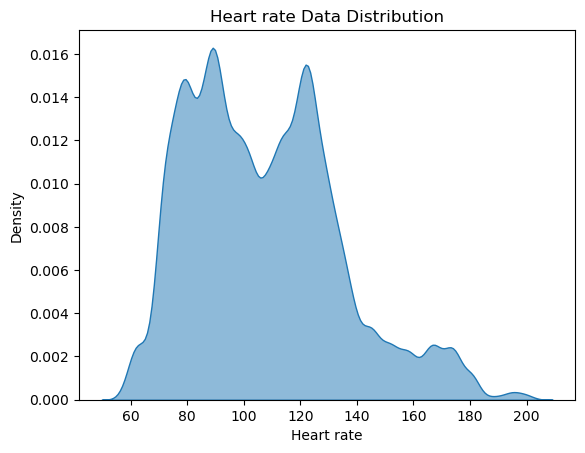

In [29]:
sns.kdeplot(data= imu_data, x='heartrate',fill=True,alpha=.5)
plt.xlabel('Heart rate')
plt.title('Heart rate Data Distribution')
plt.show()

<Figure size 1200x600 with 0 Axes>

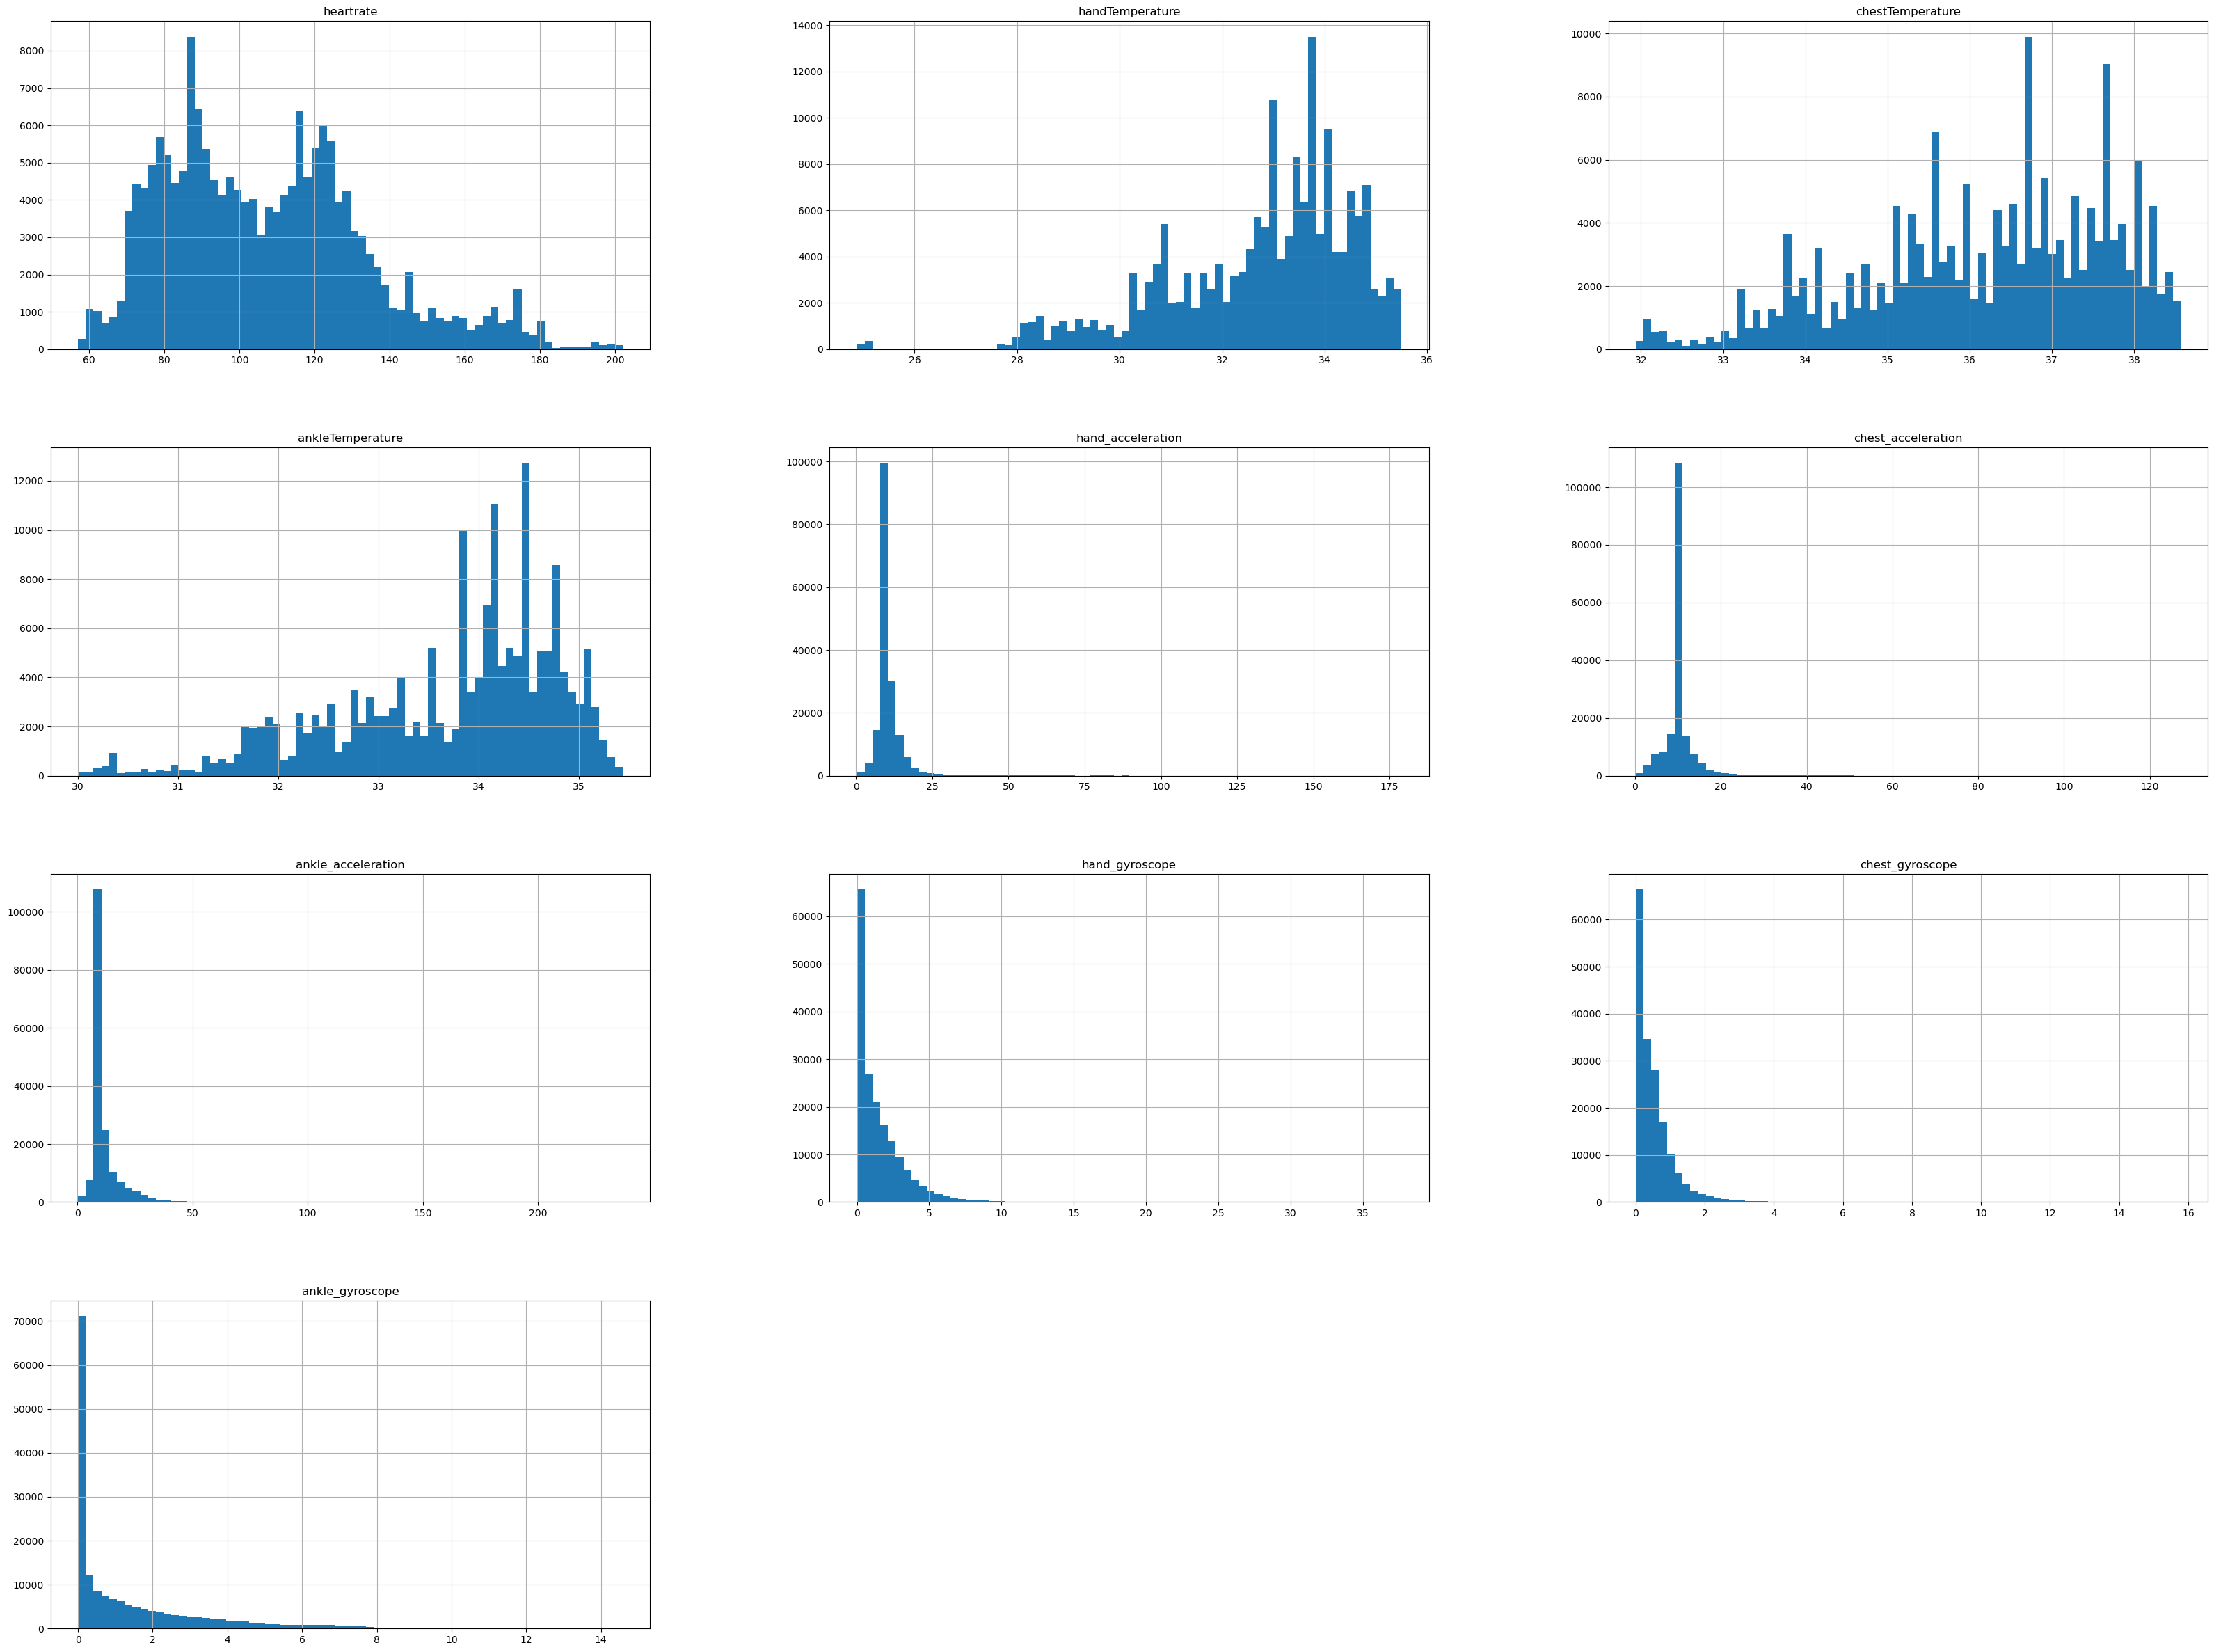

In [30]:
plt.figure(figsize=(12, 6))
num_data_eda.hist(figsize = (40,30), bins = 70)
plt.show()

+ The histogram depicts the frequency distribution of values across the dataset. The histogram is drawn across the entire dataset in this case, which includes the heart rate, hand temperature, chest temperature, ankle temperature, hand acceleration, chest acceleration, ankle acceleration, hand gyroscope, chest gyroscope, and ankle gyroscope.

+ The histogram's x-axis shows the bins that represent the range of values for the selected feature, while the y-axis shows the frequency of occurrences within each bin. The primary goal of this plot is to highlight the central tendency and distribution of the selected feature.

+ Assume we're looking at heart rate values in the scenario below. The majority of observations fall between 120 and 140 beats per minute, indicating a slightly skewed distribution to the right or left. By indicating a common heart rate range during the observed physical activities, this concentration reveals user behavior.

+ When applied to the entire dataset, the histogram becomes a powerful tool for detecting trends and potential outliers across multiple features. This nuanced understanding can aid in the development of software for the Colibri Wireless unit, ultimately improving the device.

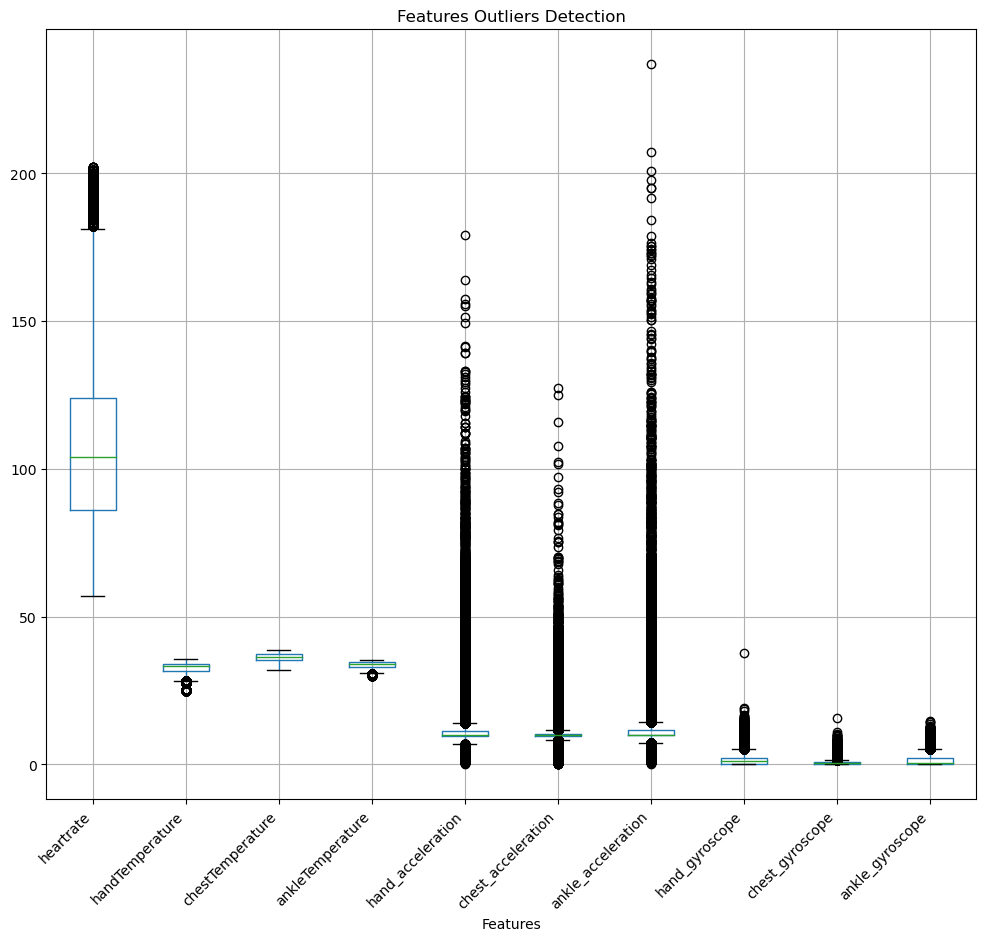

In [31]:
num_data_eda.boxplot(figsize = (12,10))
plt.xlabel('Features')
plt.title('Features Outliers Detection')
plt.xticks(rotation=45, ha='right')
plt.show()

+ We can clearly see that most of our features are strongly influenced by outliers

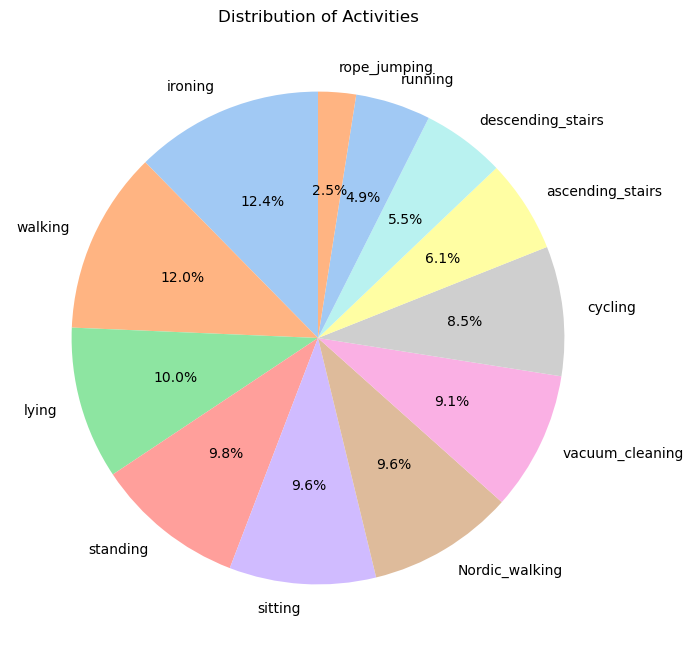

In [32]:
# Distribution of Activities
plt.figure(figsize=(10, 8))
activity_dist = imu_data['activity'].value_counts()
plt.pie(activity_dist, labels=activity_dist.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Activities')
plt.show()

+ The pie chart illustrates the distribution of activities, indicating the percentage of each activity type observed in the given data.

#### Bivariate Analysis:

To understand the relationship between independent variable and dependent variable.

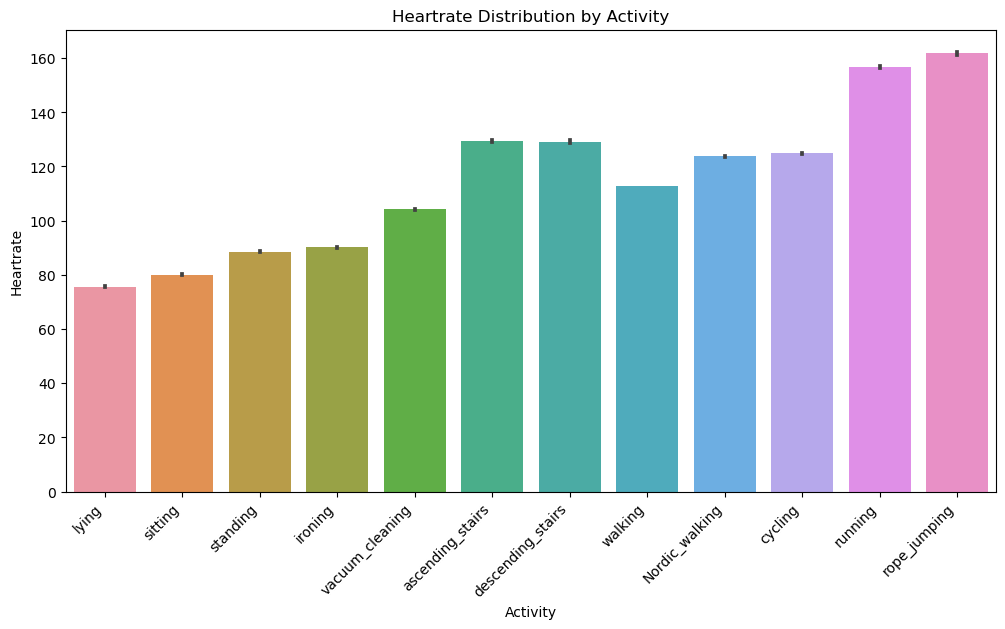

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot( x ='activity', y ='heartrate', data = imu_data)
plt.title('Heartrate Distribution by Activity')
plt.xlabel('Activity')
plt.ylabel('Heartrate')
plt.xticks(rotation=45, ha='right')
plt.show()

+ The bar chart above clearly shows that the average heart rate for physically easy activities like sitting, lying, standing, and ironing—all of which are common daily tasks for most people—is on the lower end, close to the standard resting heart rate of 72 beats per minute.

+ Cycling, Nordic walking, and stair climbing or descending all produce heart rates of more than 120 beats per minute on average. The average heart rate exceeds 150 beats per minute during more vigorous activities involving intense movement, such as running and rope jumping.

+ The average heart rate for rope jumping is the highest of the 12 activities studied, at 160 bpm, while lying down has the lowest average heart rate, at 75 bpm. These findings help us understand the varying cardiovascular demands of various physical activities.

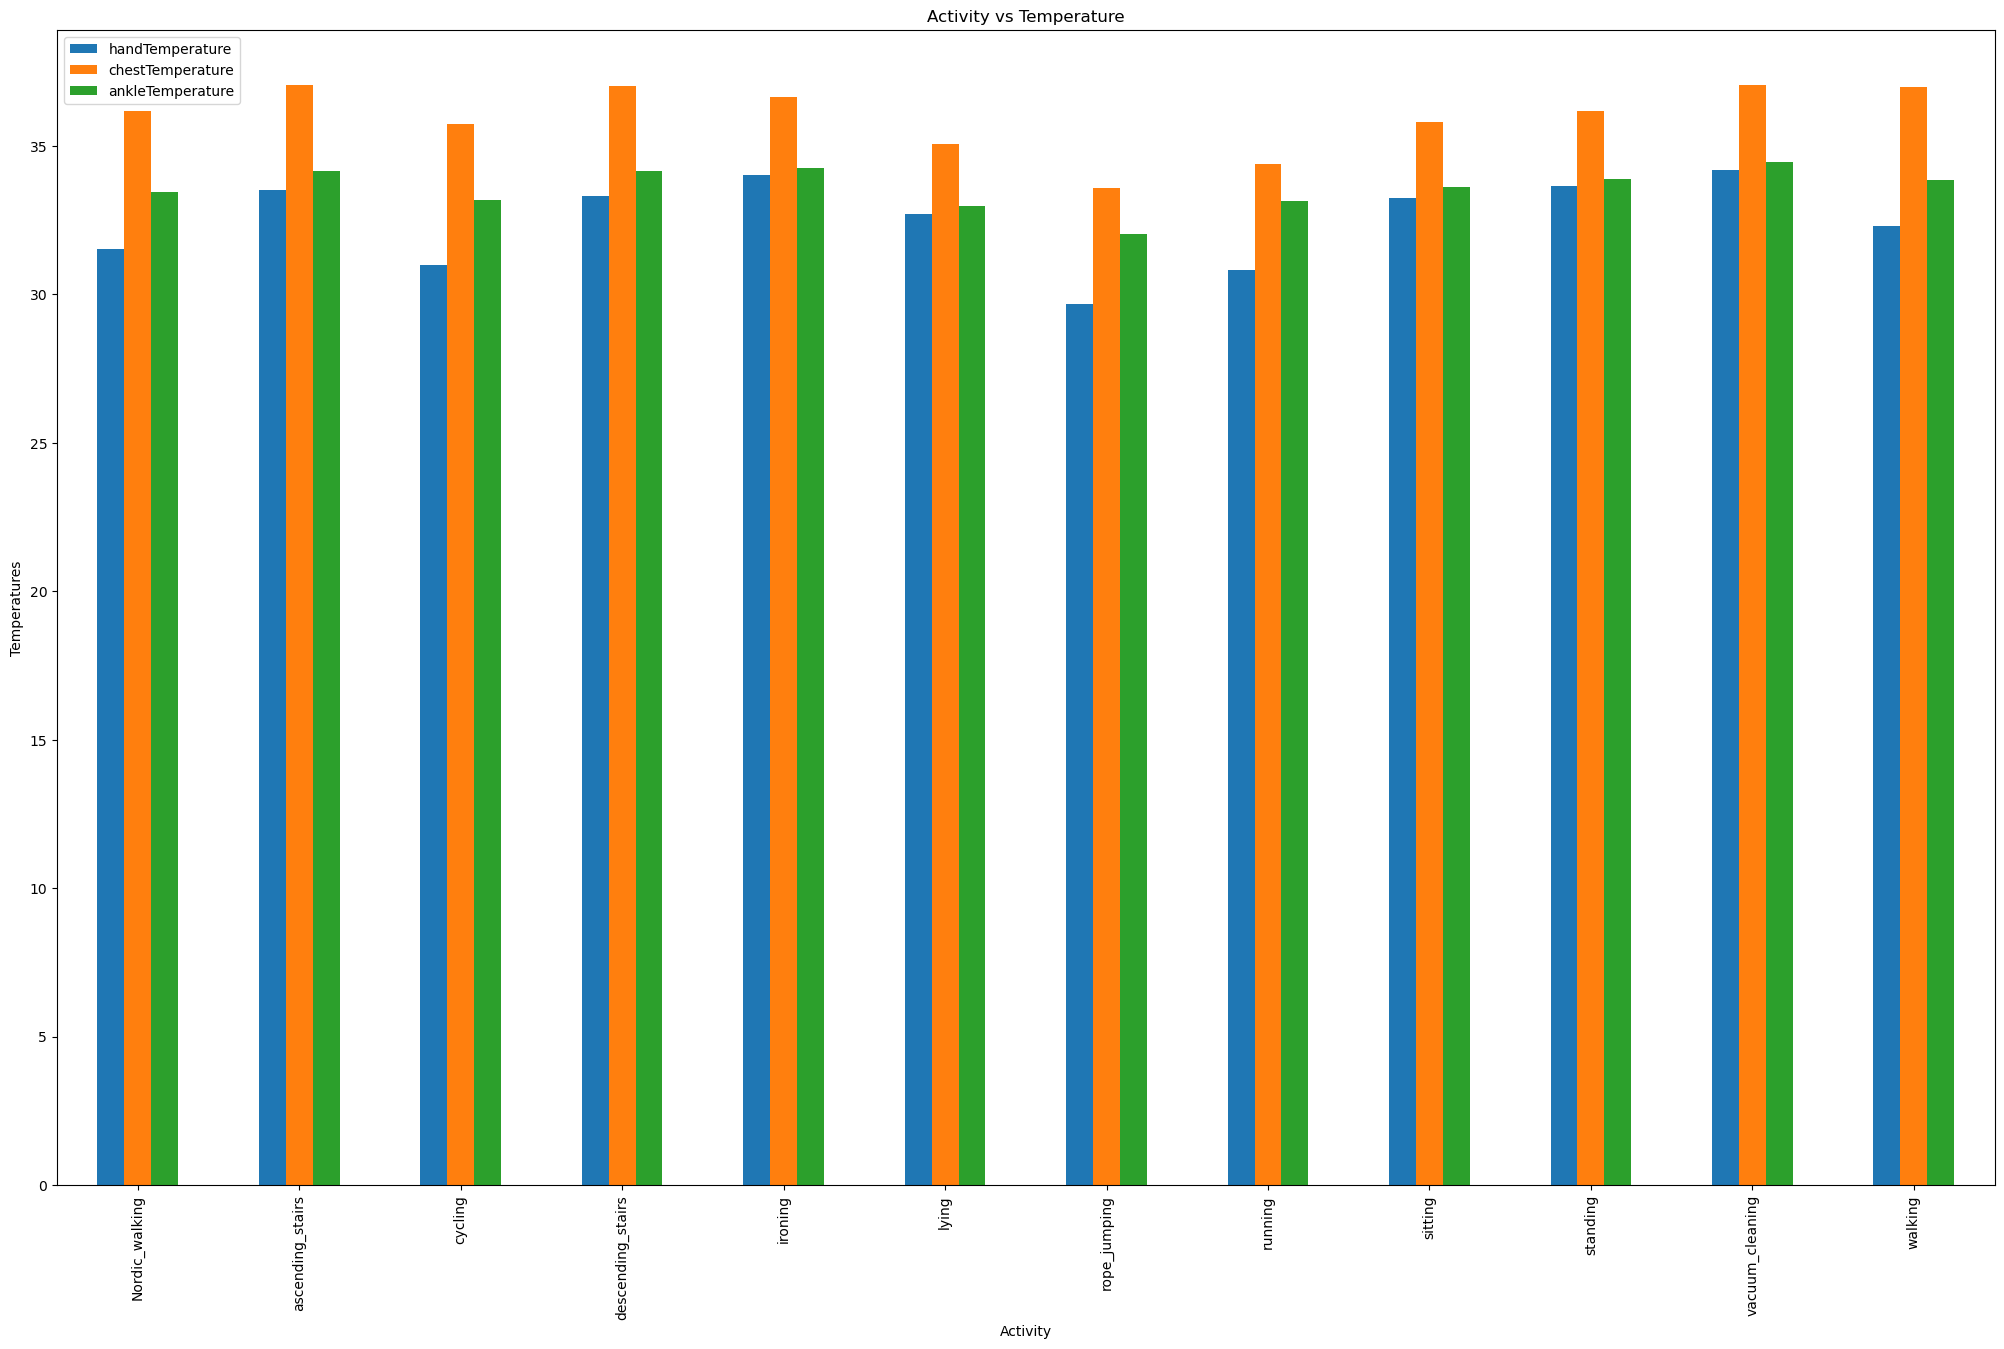

In [34]:
tempt = imu_data.groupby('activity')[['handTemperature','chestTemperature','ankleTemperature']].mean()
tempt.plot(kind = 'bar',figsize = (25,15))
plt.xlabel('Activity')
plt.ylabel('Temperatures')
plt.title('Activity vs Temperature')
plt.show()

+ This bar graph illustrates the temperatures recorded at the ankle, chest, and hand during various activities. Notably, the chest consistently registers higher temperatures compared to the hand and ankle for all activities

#### Multivariate Analysis:

To understand the quality/strength of data more than two features.

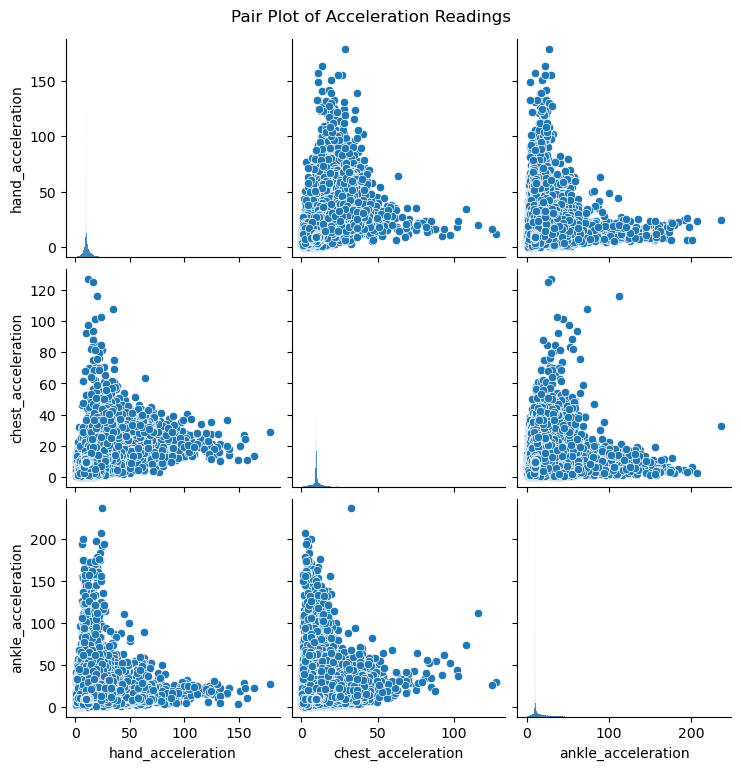

In [35]:
acceleration_columns = ['hand_acceleration', 'chest_acceleration','ankle_acceleration']

sns.pairplot(imu_data[acceleration_columns])
plt.suptitle('Pair Plot of Acceleration Readings', y=1.02)
plt.show()

+ The pair chart illustrates the acceleration features of the hand, chest, and ankle. It provides insights into the relationship and strength between these variables.

<Axes: >

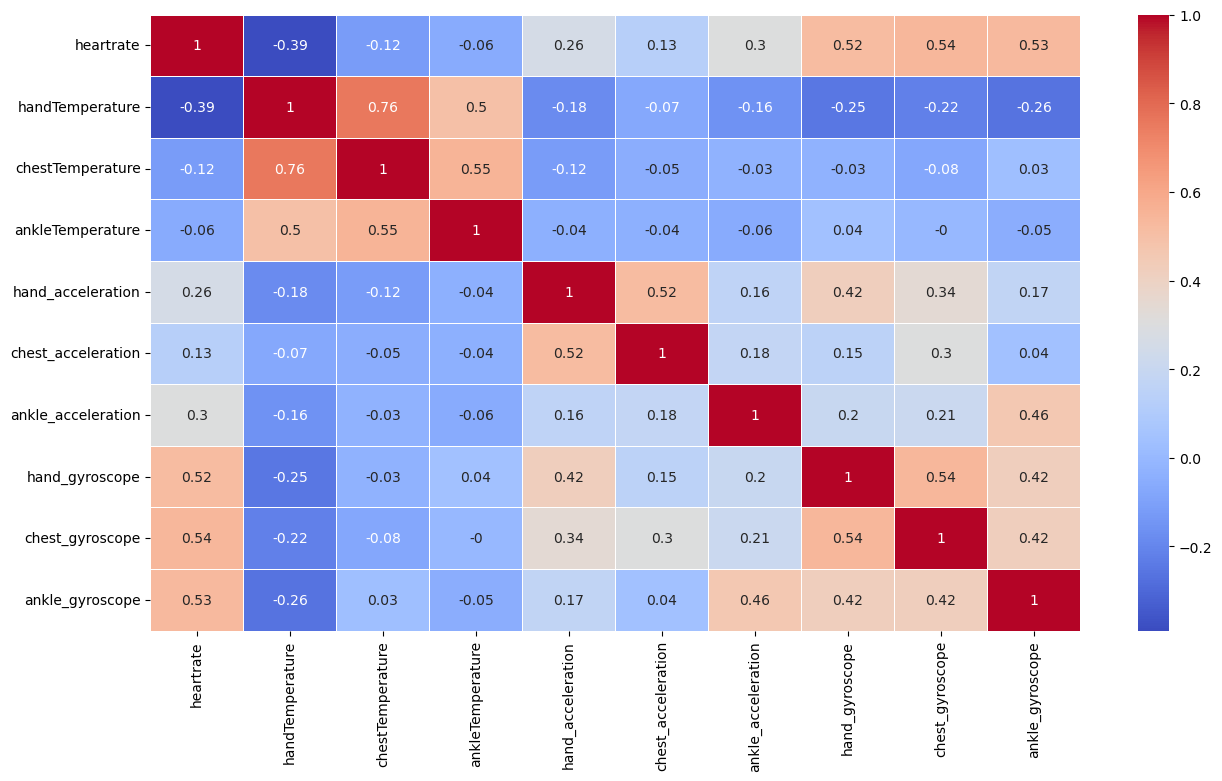

In [36]:
plt.figure(figsize=(15, 8))
num_data_eda_corr = num_data_eda.corr().round(2)
sns.heatmap(data = num_data_eda_corr, annot = True,cmap='coolwarm', linewidths=.5)

+ The intensity map reveals how independent features correlate with each other. Here, most of our features show little correlation, indicating that each feature contributes distinct information to the output, enhancing the predictability of the model.

In [37]:
imu_data.columns

Index(['activityID', 'heartrate', 'handTemperature', 'chestTemperature',
       'ankleTemperature', 'activity', 'hand_acceleration',
       'chest_acceleration', 'ankle_acceleration', 'hand_gyroscope',
       'chest_gyroscope', 'ankle_gyroscope'],
      dtype='object')

In [38]:
imu_data.drop(columns =['activityID'],axis = 1, inplace = True)

In [39]:
imu_data.rename(columns={'activity': 'activity_type',
                          'heartrate':'heart_rate',
                          'handTemperature':'hand_temperature',
                           'chestTemperature':'chest_temperature',
                          'ankleTemperature':'ankle_temperature'}, inplace=True)

In [40]:
imu_data.head()

,heart_rate,hand_temperature,chest_temperature,ankle_temperature,activity_type,hand_acceleration,chest_acceleration,ankle_acceleration,hand_gyroscope,chest_gyroscope,ankle_gyroscope
0,100,30.375,32.1875,30.75,lying,9.751993,9.875840,9.956473,0.072467,0.041521,0.049304
1,100,30.375,32.1875,30.75,lying,9.583806,9.859305,9.946165,0.435808,0.058315,0.024230
2,100,30.375,32.1875,30.75,lying,9.639631,9.798303,9.911287,0.081883,0.072202,0.022479
3,100,30.375,32.1875,30.75,lying,10.045489,9.929907,9.760667,0.374651,0.071764,0.016725
4,101,30.375,32.1875,30.75,lying,9.963993,9.804206,9.888575,0.378423,0.059240,0.067042


# 5) MODEL BUILDING

+ To solve this classification problem, I intend to use supervised machine learning classification algorithms. My strategy will be to choose algorithms that produce high accuracy while still maintaining a generalized model. 
+ I will compute accuracy using critical evaluation metrics such as accuracy score, precision score, recall score, F1 score, and confusion matrix analysis to evaluate the model's performance.
+ I intend to use the Logistic Regressor and Random Forest Classifier algorithms for this task.

In [41]:
x = imu_data.drop('activity_type',axis = 1) # Input variable
y = imu_data[['activity_type']] # output variable

In [42]:
x.shape, y.shape

((175498, 10), (175498, 1))

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state= 12, stratify=y, shuffle=True)

In [44]:
x_train.shape, y_train.shape

((140398, 10), (140398, 1))

In [45]:
x_test.shape, y_test.shape

((35100, 10), (35100, 1))

+ I have separated the input features into the variable 'X' and the output features into the variable 'Y'. I used 80% of the total dataset for training and 20% for testing to evaluate the performance of my model.

# 6) MODEL TRAINING 

In [46]:
logistic_model= LogisticRegression() # Logistic Regressor Algorithm model
random_forest_model = RandomForestClassifier() # Random forest Classifier Algorithm model

In [47]:
%%time
logistic_model.fit(x_train, y_train)

CPU times: total: 15.6 s
Wall time: 6.88 s


LogisticRegression()

In [48]:
%%time
random_forest_model.fit(x_train, y_train)

CPU times: total: 1min 22s
Wall time: 1min 31s


RandomForestClassifier()

+ I initialized my models and provided the entire training dataset for the models to undergo training.

# 7) MODEL TESTING 

In [49]:
y_train_pred_log = logistic_model.predict(x_train)
y_train_pred_rf = random_forest_model.predict(x_train)
y_test_pred_log = logistic_model.predict(x_test)
y_test_pred_rf = random_forest_model.predict(x_test)

+ I am testing my model by using my testing data

# 8) MODEL EVALUATION

#### Train Data:-

In [50]:
print("Logistic regression Model Metrics:")
print("Accuracy Score  :", accuracy_score(y_train, y_train_pred_log))
print("Precision Score :", precision_score(y_train, y_train_pred_log, average='weighted'))
print("Recall Score    :", recall_score(y_train, y_train_pred_log, average='weighted'))
print("F1 Score        :", f1_score(y_train, y_train_pred_log, average='weighted'))
print('Confusion Matrix:\n',confusion_matrix(y_train,y_train_pred_log))

Logistic regression Model Metrics:
Accuracy Score  : 0.5148720067237424
Precision Score : 0.49318220158167636
Recall Score    : 0.5148720067237424
F1 Score        : 0.4952492944251576
Confusion Matrix:
 [[ 6318  1002  1262   916    46     6     0   309    41   108   233  3244]
 [ 1110  1704  1337   837   265   110    79   540    22   336   834  1385]
 [  877   456  9509   154    16     7     0    29    53   110   571   164]
 [ 1436   702  1278   585   174    33    87   881    37   246   671  1538]
 [    0    10    51     0 10769  1001     0     0   932  2527  1961   106]
 [    3     8   206     0   419  9746     0     0   939  2440   273    26]
 [  179   101   291    51     0     0  1833   906     0     0    11   113]
 [  562   120   194    54     6     3   874  4648    14    56    53   348]
 [    0     1    64     0  1031  6169     0     0  3454  2582   182    22]
 [    0     1    44     0  2054  2331     0     0  2450  6366   535    24]
 [   93   930   501   136  3748   262     0    

In [51]:
print("Random Forest Model Metrics:")
print("Accuracy Score  :", accuracy_score(y_train, y_train_pred_rf))
print("Precision Score :", precision_score(y_train, y_train_pred_rf, average='weighted'))
print("Recall Score    :", recall_score(y_train, y_train_pred_rf, average='weighted'))
print("F1 Score        :", f1_score(y_train, y_train_pred_rf, average='weighted'))
print('Confusion Matrix:\n',confusion_matrix(y_train,y_train_pred_rf))

Random Forest Model Metrics:
Accuracy Score  : 1.0
Precision Score : 1.0
Recall Score    : 1.0
F1 Score        : 1.0
Confusion Matrix:
 [[13485     0     0     0     0     0     0     0     0     0     0     0]
 [    0  8559     0     0     0     0     0     0     0     0     0     0]
 [    0     0 11946     0     0     0     0     0     0     0     0     0]
 [    0     0     0  7668     0     0     0     0     0     0     0     0]
 [    0     0     0     0 17357     0     0     0     0     0     0     0]
 [    0     0     0     0     0 14060     0     0     0     0     0     0]
 [    0     0     0     0     0     0  3485     0     0     0     0     0]
 [    0     0     0     0     0     0     0  6932     0     0     0     0]
 [    0     0     0     0     0     0     0     0 13505     0     0     0]
 [    0     0     0     0     0     0     0     0     0 13805     0     0]
 [    0     0     0     0     0     0     0     0     0     0 12798     0]
 [    0     0     0     0     0     0  

#### Test Data:-

In [52]:
print("Logistic regression Model Metrics:")
print("Accuracy Score  :", accuracy_score(y_test, y_test_pred_log))
print("Precision Score :", precision_score(y_test, y_test_pred_log, average='weighted'))
print("Recall Score    :", recall_score(y_test, y_test_pred_log, average='weighted'))
print("F1 Score        :", f1_score(y_test, y_test_pred_log, average='weighted'))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_test_pred_log))

Logistic regression Model Metrics:
Accuracy Score  : 0.5115099715099715
Precision Score : 0.49124362362932467
Recall Score    : 0.5115099715099715
F1 Score        : 0.4924565668385956
Confusion Matrix:
 [[1558  246  362  247   15    4    0   85   10   29   49  767]
 [ 281  434  364  197   65   18   15  150    5   79  205  327]
 [ 224  133 2323   33    7    2    0   12   12   39  160   42]
 [ 343  162  334  164   38   10   22  197   11   77  155  404]
 [   0    2   14    0 2667  255    0    0  246  614  505   36]
 [   0    0   46    1  101 2446    0    0  251  599   62    9]
 [  47   22   62    8    0    0  454  243    0    0    2   33]
 [ 125   28   48   18    0    1  231 1149    0   13   13  107]
 [   1    0   12    0  243 1532    0    0  842  691   53    2]
 [   0    0   13    1  487  622    0    0  639 1568  110   11]
 [  18  211  133   23  896   67    0    0   28  337 1266  220]
 [ 580   53  160   13   74    2    0    2    0   53  180 3083]]


In [53]:
print("Random Forest Model Metrics:")
print("Accuracy Score  :", accuracy_score(y_test, y_test_pred_rf))
print("Precision Score :", precision_score(y_test, y_test_pred_rf, average='weighted'))
print("Recall Score    :", recall_score(y_test, y_test_pred_rf, average='weighted'))
print("F1 Score        :", f1_score(y_test, y_test_pred_rf, average='weighted'))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_test_pred_rf))

Random Forest Model Metrics:
Accuracy Score  : 0.9966096866096866
Precision Score : 0.9966131295765556
Recall Score    : 0.9966096866096866
F1 Score        : 0.9966096049551841
Confusion Matrix:
 [[3371    0    1    0    0    0    0    0    0    0    0    0]
 [   0 2112    0   28    0    0    0    0    0    0    0    0]
 [   0    0 2987    0    0    0    0    0    0    0    0    0]
 [   0   13    0 1904    0    0    0    0    0    0    0    0]
 [   0    0    0    0 4323    0    0    0    0   14    2    0]
 [   0    0    0    0    0 3512    0    0    3    0    0    0]
 [   0    0    0    0    0    0  860   11    0    0    0    0]
 [   0    0    0    0    0    0    7 1726    0    0    0    0]
 [   0    0    0    0    0    6    0    0 3362    8    0    0]
 [   0    0    0    0   10    0    0    0   12 3429    0    0]
 [   0    0    0    0    4    0    0    0    0    0 3195    0]
 [   0    0    0    0    0    0    0    0    0    0    0 4200]]


+ Now, I am evaluating the performance of both algorithms based on metrics such as accuracy score, precision score, recall score, F1 score, and analyzing the confusion matrix. I will finalize my assessment by considering the accuracy on both the training and testing datasets.

+ Here, it is evident that the Random Forest algorithm demonstrated superior performance with an accuracy of 99.6%, outperforming the Logistic Regressor algorithm, which achieved an accuracy of 51.15%.

+ Because of its excellent performance in classification tasks, I'm nearing the end of the Random Forest algorithm. It is well-known for its precision, noise resistance, and effective handling of numerical and categorical features. The ensemble nature of the model aids in reducing overfitting while also providing insights into feature importance.

#### Hardware placed on Hand

In [54]:
imu_data.columns

Index(['heart_rate', 'hand_temperature', 'chest_temperature',
       'ankle_temperature', 'activity_type', 'hand_acceleration',
       'chest_acceleration', 'ankle_acceleration', 'hand_gyroscope',
       'chest_gyroscope', 'ankle_gyroscope'],
      dtype='object')

In [55]:
x = imu_data.drop(['activity_type','chest_temperature', 'chest_acceleration', 'chest_gyroscope',
       'ankle_temperature', 'ankle_acceleration', 'ankle_gyroscope'],axis = 1) # input variable
y = imu_data[['activity_type']] # output variable

In [56]:
x.shape, y.shape

((175498, 4), (175498, 1))

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state= 12, stratify=y, shuffle=True)

In [58]:
x_train.shape, y_train.shape

((140398, 4), (140398, 1))

In [59]:
x_test.shape, y_test.shape

((35100, 4), (35100, 1))

In [60]:
random_forest_model = RandomForestClassifier()

In [61]:
%%time
random_forest_model.fit(x_train, y_train)

CPU times: total: 49.2 s
Wall time: 56 s


RandomForestClassifier()

In [62]:
y_pred_rf = random_forest_model.predict(x_test)

In [63]:
print("Random Forest Model Hand Hardware Metrics:")
print("Accuracy Score  :", accuracy_score(y_test, y_pred_rf))
print("Precision Score :", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall Score    :", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score        :", f1_score(y_test, y_pred_rf, average='weighted'))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_rf))

Random Forest Model Hand Hardware Metrics:
Accuracy Score  : 0.9154700854700855
Precision Score : 0.9155119170682049
Recall Score    : 0.9154700854700855
F1 Score        : 0.9153726629178408
Confusion Matrix:
 [[3163   39   70   11    0    1    0    2    0    8   12   66]
 [  29 1755   28   82   48    7    3   39    0    8  108   33]
 [  80   34 2787    6    0    0    7    5    0    8   12   48]
 [  15   43    4 1752   42    1    0    6    6    0   38   10]
 [   0   22    0   36 4020   21    0    0   45   82  108    5]
 [   3    4    0    3   44 3283    0    1   86   90    1    0]
 [   4    5   11    0    0    0  803   48    0    0    0    0]
 [  14   62   12   24    0    0   25 1571    0    8    0   17]
 [   0    0    0    6   70   83    0    0 3125   81    4    7]
 [   2    6    1    0   87   76    0    4   85 3122   37   31]
 [   0   37   16   31  193    6    0    0    3   51 2802   60]
 [  75   12   73    8    9    0    1    6   11    8   47 3950]]


+ We concluded that the Random Forest algorithm can achieve a good accuracy of 91.56% for the model designed to be worn on the hand after modeling.

#### Hardware placed on ankle

In [64]:
x = imu_data.drop(['activity_type','hand_temperature', 'hand_acceleration', 'hand_gyroscope',
       'chest_temperature', 'chest_acceleration', 'chest_gyroscope',],axis = 1) # Input Variable
y = imu_data[['activity_type']] # output variable

In [65]:
x.shape, y.shape

((175498, 4), (175498, 1))

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state= 12, stratify=y, shuffle=True)

In [67]:
x_train.shape, y_train.shape

((140398, 4), (140398, 1))

In [68]:
x_test.shape, y_test.shape

((35100, 4), (35100, 1))

In [69]:
random_forest_model = RandomForestClassifier()

In [70]:
%%time
random_forest_model.fit(x_train, y_train)

CPU times: total: 53.7 s
Wall time: 55.5 s


RandomForestClassifier()

In [71]:
y_pred_rf = random_forest_model.predict(x_test)

In [72]:
print("Random Forest Model Ankle Hardware Metrics:")
print("Accuracy Score  :", accuracy_score(y_test, y_pred_rf))
print("Precision Score :", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall Score    :", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score        :", f1_score(y_test, y_pred_rf, average='weighted'))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_rf))

Random Forest Model Ankle Hardware Metrics:
Accuracy Score  : 0.8910256410256411
Precision Score : 0.890778703732445
Recall Score    : 0.8910256410256411
F1 Score        : 0.8903290506974944
Confusion Matrix:
 [[2982   21   91    4    7    4    1    5    0    9   39  209]
 [ 124 1487  105  191   20    0    0   27    6    9   71  100]
 [  73   23 2756   13    0    0    1   12    4    2   39   64]
 [  27  142   30 1579   24    0    0   37    0    3   39   36]
 [   6   11    1    4 4036   13    0    0   98  119   37   14]
 [   1    1    2    0    5 3290    0    0   77  111   25    3]
 [   3    2   10    0    0    0  787   69    0    0    0    0]
 [  42   21   23   19    0    1   30 1583    0    0    0   14]
 [   0    1    4    1  140   43    0    0 3062  109   13    3]
 [   2    6    0    4  166   55    0    0  160 2968   82    8]
 [  43   37   16   24   50    8    0    0    9   87 2887   38]
 [ 182   22   59   23    8    4    0    4    0    3   37 3858]]


+  We concluded that the Random Forest algorithm can achieve a good accuracy of 89.13% for the model designed to be worn on the ankle after modeling.

+ The accuracy of the above modeling using the Random Forest algorithm is 89.13%, which is lower than the accuracy obtained when placing the hardware on the hand (91.56%).

+ As a result, for optimal performance, I recommend designing the hardware to be worn on the hand.

# Conclusion 


+ The Physical Activity Monitoring dataset was subjected to extensive exploratory data analysis (EDA), which yielded useful information about the properties of the collected data. A robust dataset was prepared for further examination after meticulous cleaning, null value management, and data type standardization.

+ We were able to better understand the dataset's distribution, trends, and relationships by using histograms, box plots, scatter plots, and pair plots. The pie charts and histograms depicted the subject and heart rate distributions, providing a thorough understanding of the dataset's composition.

+ Following that, machine learning models, specifically Random Forest, were used to predict activities based on the IMU data collected. The Random Forest model outperformed the other activity classes in terms of precision, recall, F1 Score, and accuracy, with a score of 99.56%. The categorization report demonstrated the model's ability to reduce false positives and false negatives for each task.

+ Finally, the RandomForestClassifier is recommended for the development of commercial activity classification hardware. It is also suggested that the hardware be designed to be worn on the hand.

# References


1. poseMethod Technique:Analysis of usain bolt's running technique Available at: https://posemethod.com/usain-bolts-running-technique/ 

1. world Jump Rope records Avalilable at:https://jumpropehub.com/world-jump-rope-record/

In [73]:
filepath="277259.ipynb"

In [74]:
import io
from nbformat import read
with io.open(filepath, "r", encoding="utf-8") as f:
    nb=read(f, 4)
word_count = 0
for cell in nb["cells"]:
    if cell.cell_type == "markdown":
        word_count += len(cell["source"].replace("#", "").lstrip().split(" "))
print(f"Submission length is {word_count}")

Submission length is 2091
